# **Sigmoid Function**

The sigmoid function, also known as the logistic function, is a crucial component of logistic regression. Logistic regression is a statistical method used for binary classification problems, where the goal is to predict the probability of an instance belonging to a particular class.

The sigmoid function is defined as:

$\sigma(z) = \frac{1}{1 + e^{-z}} \$

Here, $\sigma(z)$ represents the sigmoid function, and $z$ is the linear combination of input features and their corresponding weights in logistic regression:

$z = w_0x_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n$

In this equation:

- $\sigma(z)$ outputs values between 0 and 1.
- $e$ is the base of the natural logarithm (approximately 2.71828).
- $w_0, w_1, \ldots, w_n$ are the weights associated with the features $x_0, x_1, \ldots, x_n$.
- $x_0$ is typically set to 1, corresponding to the bias term.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*a04iKNbchayCAJ7-0QlesA.png" style= "max-width: 60%"></center>

The sigmoid function has a characteristic S-shaped curve, which maps any real-valued number to the range of 0 and 1. This property is essential in logistic regression because it allows us to interpret the output of the sigmoid function as a probability.

Interpreting $\sigma(z)$ as the probability that a given instance belongs to the positive class, the logistic regression model predicts:

- If $\sigma(z) \geq 0.5$, the instance is classified as the positive class.
- If $\sigma(z) < 0.5$, the instance is classified as the negative class.

The logistic regression model is trained to find the optimal values for the weights $w_0, w_1, \ldots, w_n$ by minimizing a cost function, such as the cross-entropy loss, which measures the difference between the predicted probabilities and the actual class labels.

In summary, the sigmoid function in logistic regression provides a smooth and differentiable way to model the probability of a binary outcome, making it a fundamental component of the logistic regression algorithm.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

## **Make a Data**

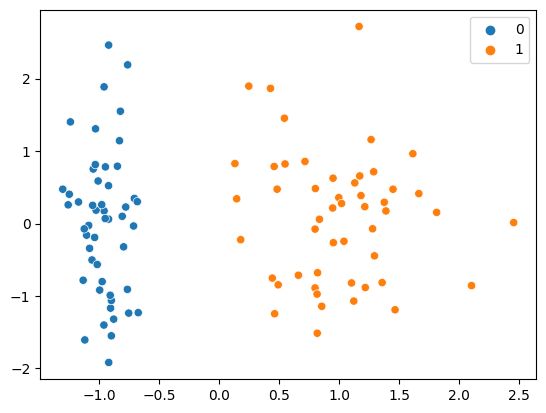

In [2]:
# Make a sample classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=42)

# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

## **Build the Perceptron Algorithm**

In [3]:
# Write a function to build the algorithm of a step function
def step(z):
    return 0 if z <= 0 else 1

In [4]:
# Write a function to build the algorithm of a perceptron
def perceptron(X, y, epochs):
    # Add an extra column for intercept term
    X = np.insert(X, 0, 1, axis=1)
    # Initialize the weights
    weights = np.ones(X.shape[1])
    # Initialize a learning rate
    lr = 0.01
    
    for i in range(epochs):
        # Select a random index
        n = np.random.randint(X.shape[0])
        # Calculate the y-predicted
        y_hat = step(np.dot(weights, X[n]))
        # Update the weights
        weights = weights + lr * (y[n] - y_hat) * X[n]
        
    return weights[0], weights[1:]

In [5]:
# Calculate the intercept and coefficients
intercept_, coef_ = perceptron(X, y, 1000)

print("Bias(w0):", intercept_)
print("Weights(w1, w2):", coef_)

Bias(w0): 0.4599999999999995
Weights(w1, w2): [1.46217528 0.27602559]


Calculate the slope(m) and y-intercept(c)<br>
`AX + BY + C = 0`<br>
`y = mX + c`<br>
`m = -(A/B)` & `c = -(C/B)`

In [6]:
m = -(coef_[0] / coef_[1])
c = -(intercept_ / coef_[1])

print("Slope(m):", m)
print("y-intercept(c):", c)

Slope(m): -5.297245347265617
y-intercept(c): -1.6665121413579091


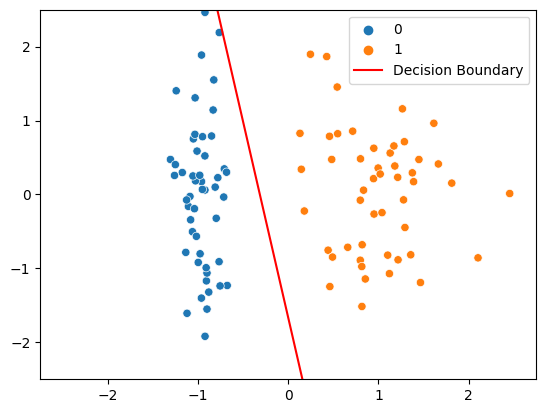

In [7]:
# Plot the decision boundary
X_line = np.linspace(-2.5, 2.5, 50)
y_line = X_line * m + c

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.lineplot(x=X_line, y=y_line, c="red", label="Decision Boundary")
plt.ylim((-2.5, 2.5))
plt.show()

## **Apply the Logistic Regression**

In [8]:
# Instantiate a Logistic Regression class
lr = LogisticRegression()

# Fit the data
lr.fit(X, y)

LogisticRegression()

In [9]:
# Print intercept and coefficients
print("Bias of LR Model (w0):", lr.intercept_)
print("Weights of LR Model (w1, w2):", lr.coef_)

Bias of LR Model (w0): [0.36755423]
Weights of LR Model (w1, w2): [[3.53992084 0.15541252]]


In [10]:
# Calculate the slope(m) and y-intercept(c) of the LR model
m_lr = -(lr.coef_[0][0] / lr.coef_[0][1])
c_lr = -(lr.intercept_[0] / lr.coef_[0][1])

print("Slope(m) of LR:", m_lr)
print("Y-Intercept(c) of LR:", c_lr)

Slope(m) of LR: -22.777578510940497
Y-Intercept(c) of LR: -2.3650232942464378


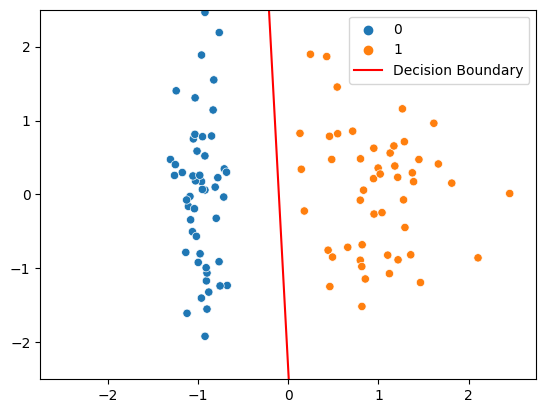

In [11]:
# Plot the decision boundary
y_line_lr = X_line * m_lr + c_lr

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.lineplot(x=X_line, y=y_line_lr, c="red", label="Decision Boundary")
plt.ylim((-2.5, 2.5))
plt.show()

## **Build the Perceptron Algorithm with Sigmoid Function**

In [12]:
# Write a function to build the algorithm of a sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
# Write a function to build the algorithm of a perceptron
def perceptron(X, y, epochs):
    # Add an extra column for intercept term
    X = np.insert(X, 0, 1, axis=1)
    # Initialize the weights
    weights = np.ones(X.shape[1])
    # Initialize a learning rate
    lr = 0.01
    
    for i in range(epochs):
        # Select a random index
        n = np.random.randint(X.shape[0])
        # Calculate the y-predicted
        y_hat = sigmoid(np.dot(weights, X[n]))
        # Update the weights
        weights = weights + lr * (y[n] - y_hat) * X[n]
        
    return weights[0], weights[1:]

In [14]:
# Calculate the intercept and coefficients
intercept_, coef_ = perceptron(X, y, 1000)

print("Bias(w0) with sigmoid function:", intercept_)
print("Weights(w1, w2) with sigmoid function:", coef_)

Bias(w0) with sigmoid function: 0.32023222662711054
Weights(w1, w2) with sigmoid function: [2.5344776  0.37051199]


In [15]:
m_sg = -(coef_[0] / coef_[1])
c_sg = -(intercept_ / coef_[1])

print("Slope(m) with sigmoid function:", m_sg)
print("y-intercept(c) with sigmoid function::", c_sg)

Slope(m) with sigmoid function: -6.84047382699577
y-intercept(c) with sigmoid function:: -0.8642965165925524


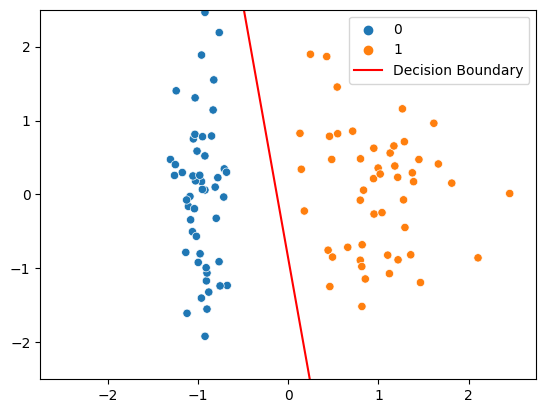

In [16]:
# Plot the decision boundary
y_line_sg = X_line * m_sg + c_sg

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.lineplot(x=X_line, y=y_line_sg, c="red", label="Decision Boundary")
plt.ylim((-2.5, 2.5))
plt.show()

## **Plot all the Decision Boundaries**

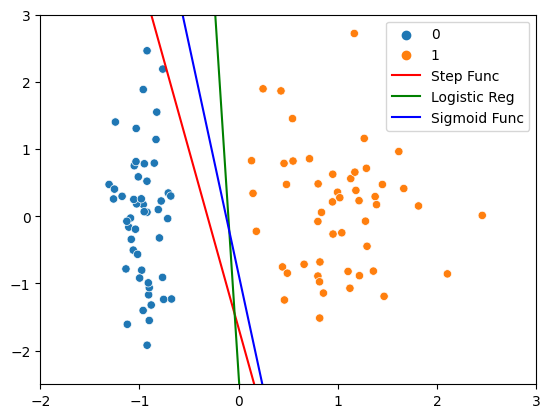

In [17]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

sns.lineplot(x=X_line, y=y_line, c="red", label="Step Func")
sns.lineplot(x=X_line, y=y_line_lr, c="green", label="Logistic Reg")
sns.lineplot(x=X_line, y=y_line_sg, c="blue", label="Sigmoid Func")
plt.xlim([-2, 3])
plt.ylim([-2.5, 3])
plt.show()